# Lab 4: Linear regression using matrix algebra
**Data Science for Biologists** &#8226; University of Washington &#8226; BIOL 419/519 &#8226; Winter 2019

Course design and lecture material by [Bingni Brunton](https://github.com/bwbrunton) and [Kameron Harris](https://github.com/kharris/). Lab design and materials by [Eleanor Lutz](https://github.com/eleanorlutz/), with helpful comments and suggestions from Bing and Kam.

### Table of Contents
1. Reading in data using the Pandas library
2. Review of linear regression 
3. Bonus exercises

### Helpful resources
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
- [10 minute Pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [Pandas Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8) by Python for Data Science
- [Importing Data Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/50d31142-3de0-4159-89b9-18b718a728ef) by Python for Data Science

### Data
- The data in this lab is from [Tager et al 1983](https://www.nejm.org/doi/full/10.1056/NEJM198309223091204) and was edited for teaching purposes. 

## Lab 4 Part 1: Reading in data using the Pandas library

The Pandas library is a powerful tool for working with large datasets. We'll work with Pandas in depth throughout the quarter, so don't worry about understanding every single detail by the end of this lab. Today we'll mainly use Pandas to load in data to use for linear regression practice. 

A Pandas `dataframe` is a type of object (like a Numpy `array`) that stores information. However, unlike a Numpy `array`, a Pandas `dataframe` can store values of many different types, such as strings or numbers. This can be very useful when working with biology data, which often includes descriptive variables like sex, color, or location. 

It's conventional to import the Pandas library using the nickname `pd`:

In [1]:
import pandas as pd

Also import the other libraries we plan to use today, and set up Matplotlib for inline plotting:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing data in Pandas 
In today's lab we'll investigate data from [Tager et al 1983](https://www.nejm.org/doi/full/10.1056/NEJM198309223091204) on the effects of smoking on lung function. The dataset includes 654 children aged 3 to 19. Tager's team collected information on each child's age, sex, and smoking status (non-smoker or smoking). Tager also recorded the child's height in inches, and measured the FEV, or Forced Expiratory Volume (a measure of healthy lung function).

In the following code block we'll read in this data from `FEV_data.csv`, located in the `Lab_04` folder. 

We'll load the data in this file as a variable called `df` (short for "dataframe").

In [3]:
df = pd.read_csv("./data/Lab_04/FEV_data.csv")

### Inspecting data in Pandas

Pandas has its own set of useful functions to inspect data. Two examples of these functions are `.head()` and `.tail()`. 

In each of these functions, we first reference the name of our Pandas dataframe - `df` - and follow this by `.head()` or `.tail()`. `df.head()` prints the first five rows of the `df` dataframe, and `df.tail()` prints the last five rows.

**Exercise 1:** Run the code in the block below to look at the output. Then, create a new code block that prints the *last* five rows instead of the first five. 

In [4]:
df.head()

,age,FEV,ht,sex,smoke,comments
0,9,1.708,57.0,Female,No,Equipment malfunction
1,8,1.724,67.5,Female,No,NaN
2,7,1.720,54.5,Female,No,Equipment malfunction
3,9,1.558,53.0,Male,No,NaN
4,9,1.895,57.0,Male,No,NaN


In [5]:
# Your code here
df.tail()

,age,FEV,ht,sex,smoke,comments
649,16,4.270,67.0,Male,Yes,NaN
650,15,3.727,68.0,Male,Yes,NaN
651,18,2.853,60.0,Female,No,NaN
652,16,2.795,63.0,Female,Yes,NaN
653,15,3.211,66.5,Female,No,NaN


Notice that the Pandas dataframe has bold column names at the top of the table. Unlike in Numpy, we can use Pandas column names to directly reference a specific column. For example, `df["ht"]` refers to all values in just the **ht** (or height) column. We can use Numpy functions we already know to find interesting attributes of these columns, such as the median or mean height: 

In [6]:
np.median( df["ht"] )

61.5

In [7]:
np.mean( df["ht"] )

61.143577981651376

**Exercise 2:** Print the minimum and maximum age of people in this dataset using the built-in functions `min()` and `max()`.

In [8]:
print( "Minimum age is:", min(df["age"]) ) # df["age"].min() will also work.
print( "Maximum age is:", max(df["age"]) ) # df["age"].max() will also work.

Minimum age is: 3
Maximum age is: 19


### Describing interesting properties of data in Pandas
We can use the Pandas function `describe` to calculate interesting attributes of our dataset. In the output below, you should see a new table with the same columns as `df.head()`. However, instead of showing the original data, we see descriptive variables such as `count` (the number of data points), `mean` (the mean), `std` (the standard deviation), etc. 

In [9]:
df.describe(include="all")

,age,FEV,ht,sex,smoke,comments
count,654.000000,654.000000,654.000000,654,654,2
unique,NaN,NaN,NaN,2,2,1
top,NaN,NaN,NaN,Male,No,Equipment malfunction
freq,NaN,NaN,NaN,336,589,2
mean,9.931193,2.636780,61.143578,NaN,NaN,NaN
std,2.953935,0.867059,5.703513,NaN,NaN,NaN
min,3.000000,0.791000,46.000000,NaN,NaN,NaN
25%,8.000000,1.981000,57.000000,NaN,NaN,NaN
50%,10.000000,2.547500,61.500000,NaN,NaN,NaN
75%,12.000000,3.118500,65.500000,NaN,NaN,NaN


### Cleaning data in Pandas
We'll talk more extensively about data hygiene later on in the course, but for now it's sufficient to know that we can use Pandas to filter out problematic data. For example, we can use a logical statement to remove all rows that say "Equipment malfunction" in the comment column. 

In [10]:
df = df[df["comments"] != 'Equipment malfunction']

Now when we print the head of the dataset, the problem rows at the 0 and 2 index have been removed (try comparing this to the output of Exercise 1).

In [11]:
df.head()

,age,FEV,ht,sex,smoke,comments
1,8,1.724,67.5,Female,No,NaN
3,9,1.558,53.0,Male,No,NaN
4,9,1.895,57.0,Male,No,NaN
5,8,2.336,61.0,Female,No,NaN
6,6,1.919,58.0,Female,No,NaN


In this lab we'll use least squares linear regression to describe the relationship between different variables in this dataset. For example, let's try to describe the relationship between child age and FEV using the equation ${y = p_1x+p_2}$, where ${x}$ is age and ${y}$ is FEV. 

To get a rough idea of the data we're working with, plot the ${x}$ age column against the ${y}$  FEV column in Matplotlib:

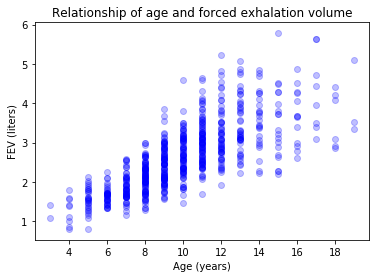

In [12]:
x = df["age"]
y = df["FEV"]

plt.scatter(x, y, alpha=0.25, color="blue")
plt.xlabel("Age (years)")
plt.ylabel("FEV (liters)")
plt.title("Relationship of age and forced exhalation volume")
plt.show()

## Lab 4 Part 2 Review of linear regression

In lecture we used matrix algebra to solve for ${p_1}$ and ${p_2}$ given datasets ${x}$ and ${y}$ and the equation ${y = p_1x + p_2}$. 

![Matrix regression figure](figures/regression_1.jpg)

Once we make the matrices ${A}$ and ${C}$ in Python, we can solve for ${B}$ (and therefore ${p_1}$ and ${p_2}$) using the Numpy linear algebra library. So if we want to find the least squares regression between ${x}$ = age and ${y}$ = FEV from our dataset, we want ${A}$ and ${C}$ matrices that look like this: 

![Matrix regression with data figure](figures/regression_2.jpg)

**Exercise 3:** Create a matrix called ${A}$ with the first column containing all ${x}$ values from the `df` age column and the second column containing all 1s. Print ${A}$. 

In [13]:
x = df["age"]
ones = np.ones(len(x))
A = np.vstack([x, ones]).T
print(A)

[[  8.   1.]
 [  9.   1.]
 [  9.   1.]
 ..., 
 [ 18.   1.]
 [ 16.   1.]
 [ 15.   1.]]


**Exercise 4:** Create a column vector called ${C}$ containing all ${y}$ values from the `df` FEV column.

In [14]:
y = df["FEV"]
C = np.vstack(y)

Now that we have ${A}$ and ${C}$, we can use Numpy to solve this system of equations. The function `np.linalg.lstsq` solves matrix equations, and returns a variety of different values representing things like the p value and the solution constants. The first item returned is a list of each constant in order. 

In [15]:
ps = np.linalg.lstsq(A, C)[0]
print(ps)

[[ 0.22178472]
 [ 0.43570982]]


For the matrix equation ${y = p_1x + p_2}$ we just solved, ${p_1}$ is the first constant and ${p_2}$ is the second:

In [16]:
p1 = ps[0]
p2 = ps[1]

Using these constants we can plot our linear regression line and see how it compares to the actual data. To plot this line, we'll create a Numpy array of ${x}$ values spanning the range of our data, and calculate the predicted ${y}$ value for each ${x}$:

In [17]:
# Create predicted y values for a range of x values
xhat = np.arange(min(x), max(x)+1)
yhat = p1*xhat + p2

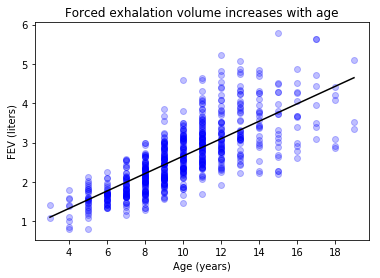

In [18]:
# Plot the actual data
plt.scatter(x, y, color="blue", alpha=0.25)

# Plot the predicted y values from our regression
plt.plot(xhat, yhat, color="black")

plt.xlabel("Age (years)")
plt.ylabel("FEV (liters)")
plt.title("Forced exhalation volume increases with age")
plt.show()

### Working with subsets of data in Pandas

So far we have one equation to describe our entire dataset. However, let's say that we're interested in creating two different models - one for smokers and one for non-smokers. We can select just the smokers in this Pandas dataframe by using a logical statement to pick just the rows where the `smoke` column value is `Yes`. This code creates a new Pandas dataframe containing just data from smokers. 

In [19]:
df_smokers = df[df["smoke"] == "Yes"]
df_smokers.head()

,age,FEV,ht,sex,smoke,comments
190,9,1.953,58.0,Male,Yes,NaN
331,14,2.236,66.0,Female,Yes,NaN
357,14,3.428,64.0,Female,Yes,NaN
365,13,3.208,61.0,Female,Yes,NaN
368,11,1.694,60.0,Male,Yes,NaN


**Exercise 5A:** Construct ${A}$ and ${C}$ for data in `df_smokers`. Use ${A}$, ${C}$, and `np.linalg.lstsq` to calculate  ${p_1}$ and ${p_2}$ values for ${y = p_1x + p_2}$. Save the ${p_1}$ value as a variable called `p1_smokers`, and save ${p_2}$ as another variable called `p2_smokers`. 

In [20]:
x_smokers = df_smokers["age"]
y_smokers = df_smokers["FEV"]

ones = np.ones(len(x_smokers))
A = np.vstack([x_smokers, ones]).T
C = np.vstack(y_smokers)

p1_smokers, p2_smokers = np.linalg.lstsq(A, C)[0]
print(p1_smokers, p2_smokers)

[ 0.07985574] [ 2.19696626]


**Exercise 5B:** Similarly, calculate the least squares regression for data in `df_nonsmokers`. Save ${p_1}$ as `p1_nonsmokers` and ${p_2}$ as `p2_nonsmokers`. 

In [21]:
df_nonsmokers = df[df["smoke"] == "No"]
df_nonsmokers.head()

,age,FEV,ht,sex,smoke,comments
1,8,1.724,67.5,Female,No,NaN
3,9,1.558,53.0,Male,No,NaN
4,9,1.895,57.0,Male,No,NaN
5,8,2.336,61.0,Female,No,NaN
6,6,1.919,58.0,Female,No,NaN


In [22]:
# Your code here
x_nonsmokers = df_nonsmokers["age"]
y_nonsmokers = df_nonsmokers["FEV"]

ones = np.ones(len(x_nonsmokers))
A = np.vstack([x_nonsmokers, ones]).T
C = np.vstack(y_nonsmokers)

p1_nonsmokers, p2_nonsmokers = np.linalg.lstsq(A, C)[0]
print(p1_nonsmokers, p2_nonsmokers)

[ 0.24233598] [ 0.25715252]


**Exercise 5C:** Create a scatterplot that shows the `df_smokers` age and FEV data in red and `df_nonsmokers` in blue. Plot the linear regression line for `df_smokers` in red and `df_nonsmokers` in blue.

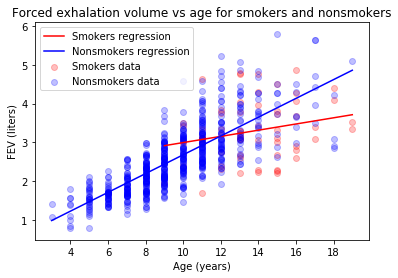

In [23]:
# Create a scatterplot of both sets of data
plt.scatter(x_smokers, y_smokers, color="red", alpha=0.25, label="Smokers data")
plt.scatter(x_nonsmokers, y_nonsmokers, color="blue", alpha=0.25, label="Nonsmokers data")

# Plot regression line for smokers only
xhat_smokers = np.arange(min(x_smokers), max(x_smokers)+1)
yhat_smokers = p1_smokers*xhat_smokers + p2_smokers
plt.plot(xhat_smokers, yhat_smokers, color="red", label="Smokers regression")

# Plot regression line for nonsmokers only
xhat_nonsmokers = np.arange(min(x_nonsmokers), max(x_nonsmokers)+1)
yhat_nonsmokers = p1_nonsmokers*xhat_nonsmokers + p2_nonsmokers
plt.plot(xhat_nonsmokers, yhat_nonsmokers, color="blue", label="Nonsmokers regression")

plt.xlabel("Age (years)")
plt.ylabel("FEV (liters)")
plt.title("Forced exhalation volume vs age for smokers and nonsmokers")
plt.legend()
plt.show()

## Lab 4 Bonus exercises

**Bonus Exercise 1:** The principles we discussed in *Exercise 3* can be used to solve linear regression equations with more than two variables. For example, to find the least squares regression line for the equation ${y = p_1x^2 + p_2x + p_3}$, we would construct the following ${A}$ and ${C}$ matrices: 

![Matrix regression with quadratics figure](figures/regression_3.jpg)

In Python, create ${A}$ and ${C}$ where ${x}$ is age and ${y}$ is FEV. Use `np.linalg.lstsq` to solve for ${p_1}$, ${p_2}$, and ${p_3}$. Plot the resulting equation alongside the data. 

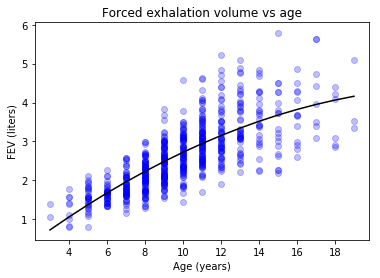

In [24]:
x = df["age"]
y = df["FEV"]

A = np.vstack([x**2, x, np.ones(len(x))]).T
C = np.vstack(y)
p1, p2, p3 = np.linalg.lstsq(A, C)[0]

xhat = np.arange(min(x), max(x)+1)
yhat = p1*xhat**2 + p2*xhat + p3

plt.scatter(x, y, color="blue", alpha=0.25)
plt.plot(xhat, yhat, color="black")

plt.xlabel("Age (years)")
plt.ylabel("FEV (liters)")
plt.title("Forced exhalation volume vs age")
plt.show()

**Bonus Exercise 2:** Create ${A}$ and ${C}$ to solve for ${p_1}$, ${p_2}$, and ${p_3}$ given the equation ${z = p_1x + p_2y + p_3}$ where ${x}$ is age, ${y}$ is height, and ${z}$ is FEV. Make a plot that includes the original data and the fitted regression line. 

The code to create a 3D matplotlib plot is given to you below.

In [25]:
# your code here to solve for p
x = df["age"]
y = df["ht"]
z = df["FEV"]

A = np.vstack([x, y, np.ones(len(x))]).T
C = np.vstack(z)
bonus_p1, bonus_p2, bonus_p3 = np.linalg.lstsq(A, C)[0]

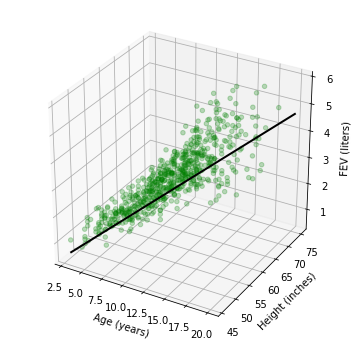

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data
ax.scatter(df["age"], df["ht"], df["FEV"], color="green", alpha=0.25)

# Your code here to plot your regression line:
xhat = np.linspace(min(x), max(x)+1, 100)
yhat = np.linspace(min(y), max(y)+1, 100)
zhat = bonus_p1*xhat + bonus_p2*yhat + bonus_p3
ax.plot(xhat, yhat, zhat, color="k", lw=2)
ax.set_xlabel("Age (years)")
ax.set_ylabel("Height (inches)")
ax.set_zlabel("FEV (liters)")
plt.show()

**Bonus Exercise 3:** Create ${A}$ and ${C}$ to solve for each ${p}$ constant given the equation ${z = p_1x^2 + p_2y^2 + p_3x + p_4y + p_5}$ where ${x}$ is age, ${y}$ is height, and ${z}$ is FEV. Make a 3D plot that includes the original data and the fitted regression line. 

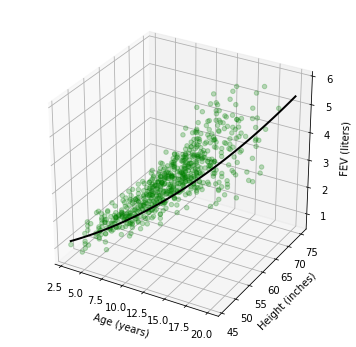

In [27]:
x = df["age"]
y = df["ht"]
z = df["FEV"]

A = np.vstack([x**2, y**2, x, y, np.ones(len(x))]).T
C = np.vstack(z)
p1, p2, p3, p4, p5 = np.linalg.lstsq(A, C)[0]

xhat = np.linspace(min(x), max(x)+1, 100)
yhat = np.linspace(min(y), max(y)+1, 100)
zhat = p1*xhat**2 + p2*yhat**2 + p3*xhat + p4*yhat + p5

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color="green", alpha=0.25)
ax.plot(xhat, yhat, zhat, color="k", lw=2)
ax.set_xlabel("Age (years)")
ax.set_ylabel("Height (inches)")
ax.set_zlabel("FEV (liters)")
plt.show()